# Bistability in Attractor Spaces
In this problem, we’re going to build “bump” attractors and study their properties. We’re going to be thinking of them as models of hippocampal place cell activity. We’re going to simplify the problem in three ways: 
1. The world our “rats” will live in is going to be 1-dimensional, i.e., a linear track. 
2. Direction isn’t going to matter: pointing one way along the track will be considered equivalent to pointing the other way along the track. 
3. Instead of using spiking neurons, we’re going to use simple firing rate neuron models. These simplifications make the coding a little easier, but still allow getting at some of the basic issues.

For each neuron $i$, we will have two activity variables: $u_i$, which will be roughly analogous to membrane potential; and $r_i$, which will be analogous to firing rate. Inputs from other neurons affect $u_i$. Then $u_i$ gets translated into firing rate $r_i$ by a nonlinear function that doesn't go below below zero and saturates at high firing rates. Each neuron's membrane potential evolves in time according to:

> $\frac{du_i}{dt} = -g_i^{leak} u_i(t) + I_i + I_{global} + \sum\limits_{j}w_{ij}r_j(t)+\sigma_n$

The first term represents a leak conductance that drives $u$ towards the resting membrane potential. Note that for simplicity, here we're going to be using a resting membrane potential of zero, and we're also going to set $g_{leak} = 1 $. The second and third terms represents an external current drive to the neuron. The fourth term is a weighted sum of the firing rates of all the other neurons. The final fifth term is a noise term, which we will assume is Gaussian with mean zero and standard deviation $\sigma_n$, and independent across neurons.

The firing rate of neuron $i$ at any point in time will be defined as:

> $r_i(t) = \frac{1}{2} + \frac{1}{2} \cdot tanh(\frac{u_i(t)-\theta}{\beta})$

Set $\theta = 0.5$ and $\beta = 0.3$ and then plot $r$ as a function of $u$ to get a fool for what this function looks like. It is zero for $u << \theta$; between zero and one when $u$ si within order $\beta$ of $\theta$; and saturates when 1 for $u >> \theta$. 

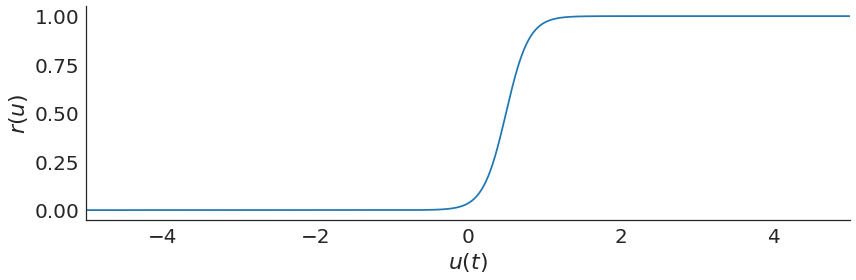

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def firing_rate(u, theta=0.5, beta=0.3):
    return 0.5 + 0.5 * np.tanh( (u - theta) / beta )

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define values for u.
u = np.linspace(-5,5,1000)

## Estimate r.
r = firing_rate(u)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(u,r)
ax.set(xlim=(u.min(), u.max()), xlabel=r'$u(t)$', ylabel=r'$r(u)$')

sns.despine()
plt.tight_layout()

## Connectivity pattern for a bump attractor
We're not going to set up a pattern of weights that leads to a "bump" attractor. First we order the neurons in space: we're going to say that the index $i$ not only identifies the neuron, but also associates it with position $i$ along a line. Then we define the weight from neuron $j$ to neuron $i$ as:

> $w_{ij} = (w_E \ / \ \sigma_E) \cdot e^{-(i-j)^2 \ / \ 2 \sigma^2_E} - g_I$

This means that neuron $i$ receives excitatory weights from neurons that are within a vicinity $\sigma_E$ of it. It also receives inhibitory weights ($g_I$) from all other neurons, regardless of where they are. (Note: we set $w_{ij}$ to zero for all $i$; that is, we'll have no self-connection weights.)

We've written baseline code for you to work with in this problem set. The idea is to start you off; this code is for you to go into, modify, and chew on as you see fit. Download the Matlab code, unpack it, go to the relevant directory while within Matlab, and type:

> single_bump [ENTER}

The default parameters that you start with will include local excitatory weights and global inhibitory weights as described in equation (3) above, as well as a global drive $I_{global}$ of 2.1. The green plot shows the activity of 150 neurons, connected as above. The noise term, which is different on every time step, is what makes the network lively.

You'll see a smaller axis below the main plot, with a line in black. This represents the inputs $I_i$. Their default value is 0. On the top right of the figure, you'll see three graphical user interface (GUI) entries that say "drive strength" (let’s call this $w_D$), "drive speed" (let's call this $dV$), and "drive position" (let's call this $\mu D$). These control the magnitude of an external drive $I_i$ that will be distributed as a Gaussian, with peak amplitude "drive strength" and centered at neuron "drive position":

> $I_i = w_D \cdot e^{-(i-\mu_D)^2 \ / \ 2 \sigma^2_E} $

> $\frac{d \mu_D}{dt} = dV$

Type 0.05 into "drive strength", press ENTER, and see what happens. Now replace the 0.05 with a 0. Now type 1.5 into "drive strength" and 2 into "drive speed." Have fun! Play with the code at will.

In [2]:
from single_bump import *
sns.set_context('notebook', font_scale=1)
%matplotlib qt5
%load_ext autoreload

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

sb = SingleBump(T=50)
sb.run_simulation(plot=True);

One way to interpret the external drive, $I_i$, is that it represents the net input to hippocampal neurons coming from sensory systems: when the rat is near position $i$, the place cells that are closest to $i$ will be the ones most strongly driven by the sensory input. As the rat moves around, the sensory input changes, and provides drive to other place cells.

## Exercise 1
Are activity bumps in this network really stable? Run the network, starting from the default, $u_i(t=0)=0$, for 50 simulated time points (i.e. until $t = 50$) using different values of $w_D$, ranging from -0.5 to 0.5. Plot the peak value of $r$ at the end of the simulation (namely, $max_i(r_i(t=50))$ as a function of $w_D$. Now repeat this experiment, but this time from having a bump of activity already present, by using the initial values:

> $u_i(t=0) = 4 \cdot e^{-(i - N_{cells}/2)^2 \ / \ 2 \sigma^2_E} $

where $N_{cells}$ is the number of neurons in the simulation. Again plot the peak value of the final $r$ as a function of $w_D$, on the same axes as your immediately previous plot. Explain what you see in your plots.

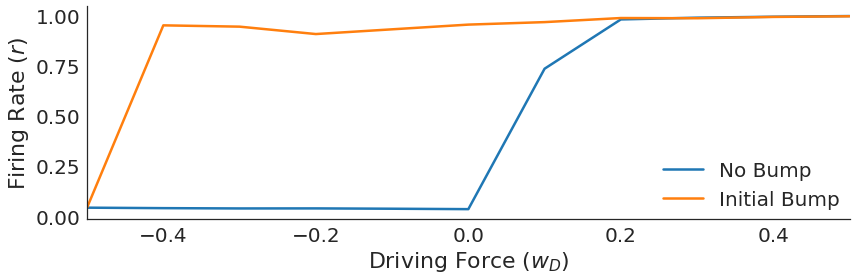

In [3]:
sns.set_context('notebook', font_scale=2)
%autoreload
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define single bump parameters.
N = 250
T = 50
sigmaE = 4

## Define range of driving forces, wD.
driving_forces = np.linspace(-0.5, 0.5, 11)

## Define initial "bumps".
bumps = 4 * np.exp( -( np.arange(1,N+1) - N/2 )**2 / (2 * sigmaE ** 2) )
bumps = np.vstack([np.zeros_like(bumps), bumps])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulations.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(18940)

## Preallocate space.
R = np.zeros((bumps.shape[0], driving_forces.shape[0]))

for j, wD in enumerate(driving_forces):
    
    for i, u0 in enumerate(bumps):
        
        ## Initialize simulation.
        sb = SingleBump(N=N, T=T, wD=wD, u0=u0)

        ## Run simulation.
        r = sb.run_simulation(plot=False)

        ## Extract and store max firing rate.
        R[i,j] = r.max()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot.
ax.plot(driving_forces, R[0], lw=2.5, label='No Bump')
ax.plot(driving_forces, R[1], lw=2.5, label='Initial Bump')
ax.set(xlim=(driving_forces.min(), driving_forces.max()), xlabel=r'Driving Force ($w_D$)',
       ylabel=r'Firing Rate ($r$)')
ax.legend(loc=4, borderpad=0)

sns.despine()
plt.tight_layout()